In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with np.load("outputs/GPU-cubature-newtria-T5e3-25runs-time.npz") as loaded:
    gpu_cubature_std_seq_time = loaded["gpu_cubature_std_seq_time"]
    gpu_cubature_std_par_time = loaded["gpu_cubature_std_par_time"]
    gpu_cubature_sqrt_seq_time = loaded["gpu_cubature_sqrt_seq_time"]
    gpu_cubature_sqrt_par_time = loaded["gpu_cubature_sqrt_par_time"]

with np.load("outputs/GPU-extended-newtria-T5e3-25runs-time.npz") as loaded:
    gpu_extended_std_seq_time = loaded["gpu_extended_std_seq_time"]
    gpu_extended_std_par_time = loaded["gpu_extended_std_par_time"]
    gpu_extended_sqrt_seq_time = loaded["gpu_extended_sqrt_seq_time"]
    gpu_extended_sqrt_par_time = loaded["gpu_extended_sqrt_par_time"]    

In [10]:
T = 5e3    
lengths_space = np.logspace(1, np.log10(T), num=10).astype(np.int32)  

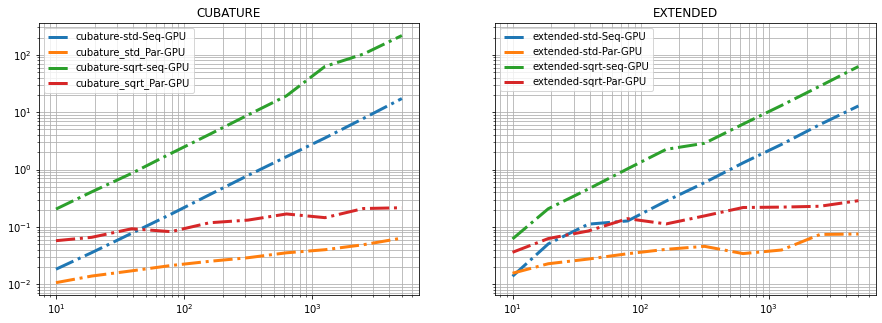

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5), sharex=True, sharey=True)
axes[0].loglog(lengths_space, gpu_cubature_std_seq_time, label="cubature-std-Seq-GPU", linestyle="-.", linewidth=3)
axes[0].loglog(lengths_space, gpu_cubature_std_par_time, label="cubature_std_Par-GPU", linestyle="-.", linewidth=3)
axes[0].loglog(lengths_space, gpu_cubature_sqrt_seq_time, label="cubature-sqrt-seq-GPU", linestyle="-.", linewidth=3)
axes[0].loglog(lengths_space, gpu_cubature_sqrt_par_time, label="cubature_sqrt_Par-GPU", linestyle="-.", linewidth=3)
axes[0].grid(True, which="both")
axes[0].set_title("CUBATURE")
axes[0].legend()

axes[1].loglog(lengths_space, gpu_extended_std_seq_time, label="extended-std-Seq-GPU", linestyle="-.", linewidth=3)
axes[1].loglog(lengths_space, gpu_extended_std_par_time, label="extended-std-Par-GPU", linestyle="-.", linewidth=3)
axes[1].loglog(lengths_space, gpu_extended_sqrt_seq_time, label="extended-sqrt-seq-GPU", linestyle="-.", linewidth=3)
axes[1].loglog(lengths_space, gpu_extended_sqrt_par_time, label="extended-sqrt-Par-GPU", linestyle="-.", linewidth=3)
axes[1].grid(True, which="both")
axes[1].set_title("EXTENDED")
axes[1].legend();

In [29]:
data = np.stack([
                 lengths_space,
                 gpu_cubature_std_seq_time,
                 gpu_cubature_std_par_time,
                 gpu_cubature_sqrt_seq_time,
                 gpu_cubature_sqrt_par_time,
                 gpu_extended_std_seq_time,
                 gpu_extended_std_par_time,
                 gpu_extended_sqrt_seq_time,
                 gpu_extended_sqrt_par_time],
                 axis=1)

columns = ["time_steps",
           "gpu_cubature_std_seq_time",
           "gpu_cubature_std_par_time",
           "gpu_cubature_sqrt_seq_time",
           "gpu_cubature_sqrt_par_time",
           "gpu_extended_std_seq_time",
           "gpu_extended_std_par_time",
           "gpu_extended_sqrt_seq_time",
           "gpu_extended_sqrt_par_time"]

df = pd.DataFrame(data=data, columns=columns)
df.to_csv("GPU.csv")

In [31]:
print(df)

   time_steps  gpu_cubature_std_seq_time  gpu_cubature_std_par_time  \
0        10.0                   0.018296                   0.010675   
1        19.0                   0.035600                   0.013911   
2        39.0                   0.077569                   0.017154   
3        79.0                   0.166882                   0.021240   
4       158.0                   0.365031                   0.025146   
5       315.0                   0.789804                   0.029034   
6       629.0                   1.677149                   0.035386   
7      1256.0                   3.554838                   0.040049   
8      2506.0                   7.782264                   0.048923   
9      4999.0                  17.309334                   0.063792   

   gpu_cubature_sqrt_seq_time  gpu_cubature_sqrt_par_time  \
0                    0.204549                    0.057526   
1                    0.408395                    0.065885   
2                    0.860400      